In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os
import os.path
import pytest
import os.path as op
import sys
import matplotlib.pyplot as plt
import scipy
import glob
from pathlib import Path
import numpy as np

sys.path.insert(0,str(Path("~/projects/imtools").expanduser()))

import imtools.trainer3d
import imtools.datasets
import imtools.ml
import io3d
import sed3
from loguru import logger
import bodynavigation
# logger.disable("io3d")
logger.remove()
logger.add(sys.stderr, level='INFO')

2

In [4]:

# Define feature function
def externfv(data3d, voxelsize_mm):        # scale
    f0 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=3).reshape(-1, 1)
    f1 = scipy.ndimage.filters.gaussian_filter(data3d, sigma=1).reshape(-1, 1) - f0
    ss = bodynavigation.body_navigation.BodyNavigation(data3d, voxelsize_mm)
    f3 = ss.dist_sagittal().reshape(-1, 1)
    f4 = ss.dist_coronal().reshape(-1,1)
    #dist saggital, coronall
    fv = np.concatenate([
        f0, f1, f3, f4
    ], 1)
    return fv

In [6]:
ol = imtools.trainer3d.Trainer3D()
# select feature function
ol.feature_function = externfv
# select classifier Gaussian Mixture model Classifier
ol.cl = imtools.ml.gmmcl.GMMCl(n_components=3)

i=24
datap = io3d.datasets.read_dataset("pilsen_pigs", 'data3d', i)
datap_liver = io3d.datasets.read_dataset("pilsen_pigs", 'kidney', i)
print('datap', datap)
print('datap_liver', datap_liver)
ol.add_train_data(datap["data3d"], (datap_liver["data3d"] > 0).astype(np.uint8), voxelsize_mm=datap["voxelsize_mm"])

ol.fit()

datap {'voxelsize_mm': [0.7999999999999545, 0.6660078125, 0.6660078125], 'Modality': 'CT', 'SeriesNumber': "9", 'orientation_axcodes': 'SPL', 'SeriesDescription': 'ThorAbd_Ven  0,80  Br40  S1', 'ImageComments': '\r\n', 'AcquisitionDate': '20191210', 'StudyDate': '20191210', 'StudyID': 'ffaa0baf-b867-48', 'StudyDescription': 'ThrAbd_2F(Adult)', 'PatientSex': '', 'PatientAge': '001D', 'PatientID': 'Tx024D', 'PatientName': 'Tx024D', 'dcmfilelist': ['h:\\medical\\orig\\pilsen_pigs\\Tx024D_Ven\\PATIENT_DICOM\\Tx024D.CT.ThrAbd2FAdult.9.1066.2020.06.08.10.54.42.750.45911216.dcm', 'h:\\medical\\orig\\pilsen_pigs\\Tx024D_Ven\\PATIENT_DICOM\\Tx024D.CT.ThrAbd2FAdult.9.1065.2020.06.08.10.54.42.750.45911205.dcm', 'h:\\medical\\orig\\pilsen_pigs\\Tx024D_Ven\\PATIENT_DICOM\\Tx024D.CT.ThrAbd2FAdult.9.1064.2020.06.08.10.54.42.750.45911194.dcm', 'h:\\medical\\orig\\pilsen_pigs\\Tx024D_Ven\\PATIENT_DICOM\\Tx024D.CT.ThrAbd2FAdult.9.1063.2020.06.08.10.54.42.750.45911183.dcm', 'h:\\medical\\orig\\pilsen_pig

TypeError: 'NoneType' object is not subscriptable

In [13]:
# one = list(imtools.datasets.sliver_reader("*000.mhd", read_seg=True))[0]
# numeric_label, vs_mm, oname, orig_data, rname, ref_data = one
i = 24
datap = io3d.datasets.read_dataset("pilsen_pigs", 'data3d', i)
fit = ol.predict(datap["data3d"][600:900:1], voxelsize_mm=datap["voxelsize_mm"])

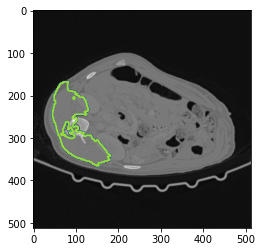

In [21]:
plt.imshow(datap["data3d"][625],cmap='gray')
plt.contour(fit[25])